Load required libraries for the analysis and read in the patient data that were collected at baseline.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Set the seaborn style
sns.set_theme(style="whitegrid")

Load baseline data 

In [2]:
df_hiv =pd.read_stata("../Data/Clinical/baseline.dta")

print(df_hiv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Columns: 300 entries, patid to datecomp
dtypes: datetime64[ns](4), float32(4), float64(264), int8(15), object(13)
memory usage: 2.4+ MB
None


#### Exploratory Data Analysis


##### Univariate analysis on the socio-demographic data

Social Demographic Data

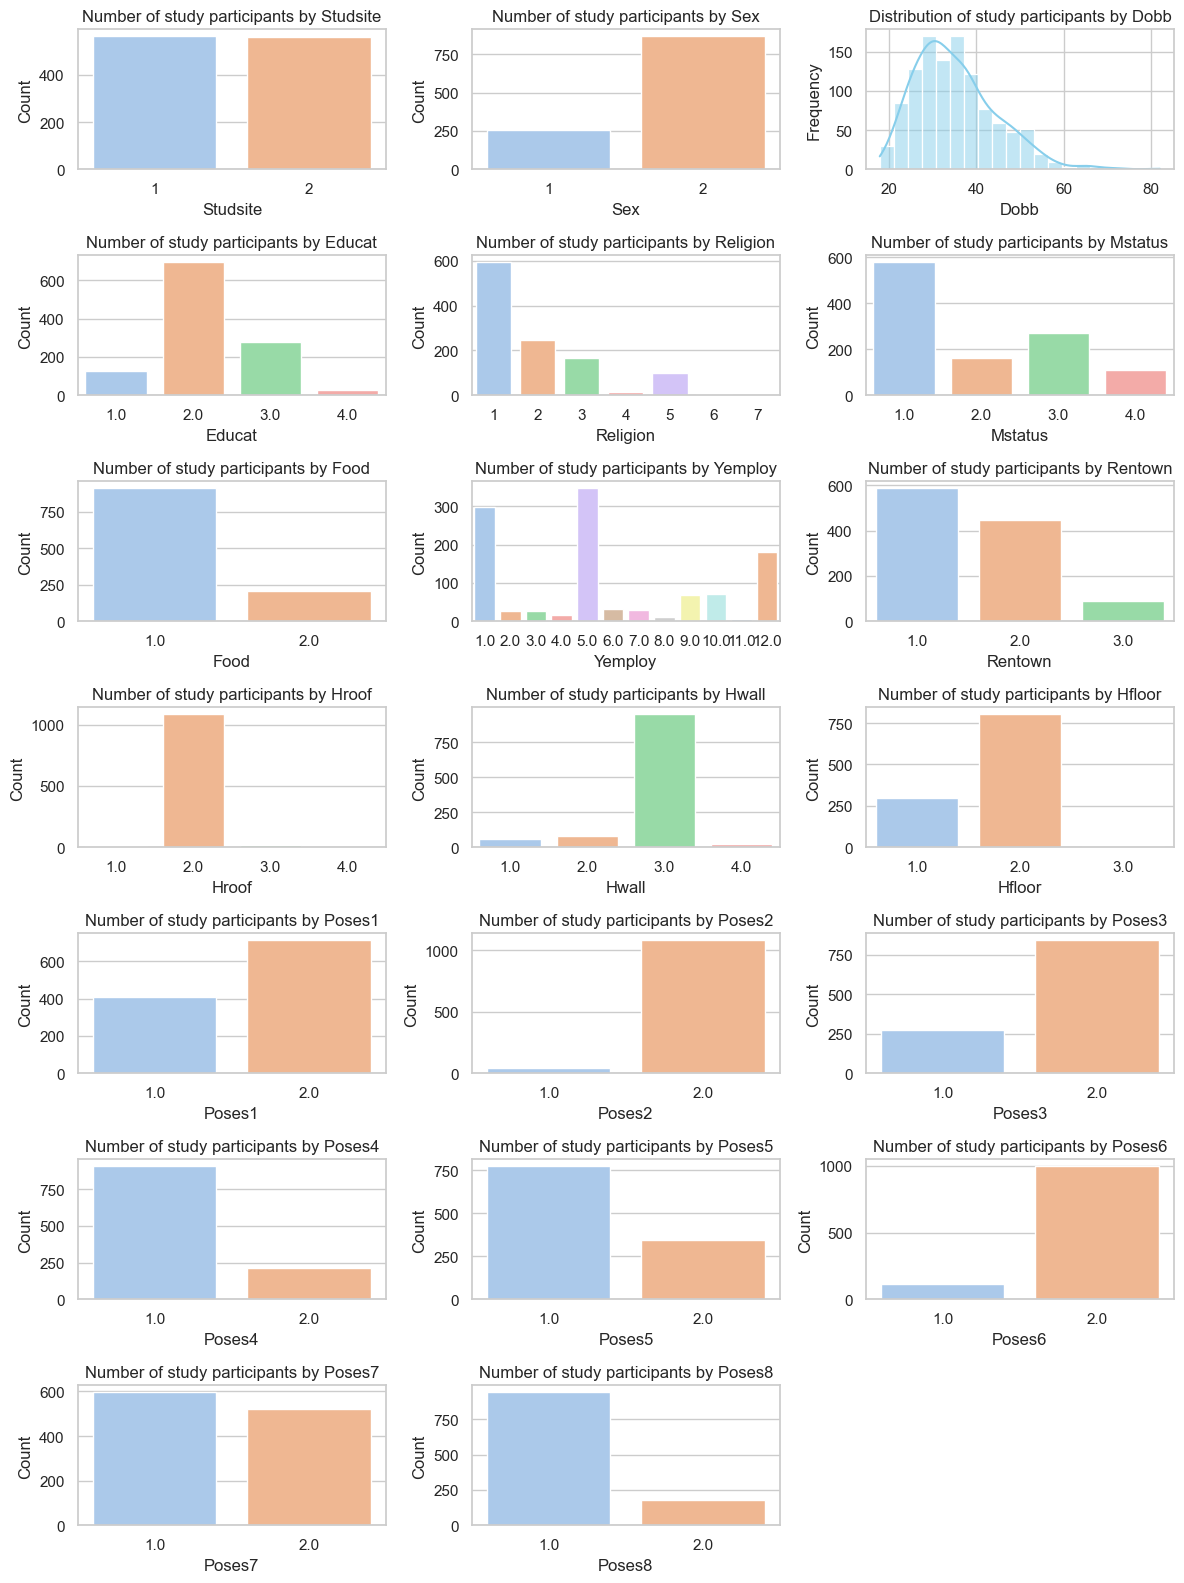

In [3]:
import math

# List of columns with socio-demographic data
socio_data = ['studsite', 'sex', 'dobb', 'educat', 'religion', 'mstatus', 'food', 'yemploy',
              'rentown', 'hroof', 'hwall', 'hfloor', 'poses1', 'poses2', 'poses3',
              'poses4', 'poses5', 'poses6', 'poses7', 'poses8']

# Set the number of columns in the grid
num_cols = 3

# Calculate the number of rows needed
num_rows = math.ceil(len(socio_data) / num_cols)

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))

# Flatten the axes to iterate through them
axes = axes.flatten()

# Iterate through each categorical column and create count plots or histplots
for i, column in enumerate(socio_data):
    if i < len(axes):  # Ensure we have enough subplots
        if i == 2:  # Replace the third count plot with histplot for 'dobb'
            sns.histplot(data=df_hiv, x=column, bins=20, kde=True, color='skyblue', ax=axes[i])
            axes[i].set_title(f'Distribution of study participants by {column.capitalize()}')
            axes[i].set_xlabel(column.capitalize())
            axes[i].set_ylabel('Frequency')
        else:
            sns.countplot(data=df_hiv, x=column, palette='pastel', ax=axes[i])
            axes[i].set_title(f'Number of study participants by {column.capitalize()}')
            axes[i].set_xlabel(column.capitalize())
            axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(len(socio_data), num_cols * num_rows):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


We modified the education column by merging secondary and tertiary education into one group called post_primary

In [4]:
df_hiv['educat'] = np.select(
    [
        (df_hiv['educat'].isin([1, 5])),  # Categories 1, 5,'informal'
        (df_hiv['educat'] == 2),  # Category 2 as 'Primary'
        (df_hiv['educat']. isin([3,4])),  # Category 4 as 'PostPrimary'
        (pd.isnull(df_hiv['educat']))  # NaN as 'Missing'
    ],
    [
        "Informal",
        "Primary",
        "PostPrimary",
        "Missing",
    ],
    default=df_hiv['educat']  # Keep other categories unchanged
)

# Display the updated DataFrame
print(df_hiv['educat'].value_counts())


educat
Primary        695
PostPrimary    304
Informal       124
Missing          3
Name: count, dtype: int64


We merged all participants with judeo-christian beliefs into a single category called christian 

In [5]:
df_hiv['religion'] = np.select(
    [
        (df_hiv['religion'].isin([1, 2, 5, 6])),  # Categories 1, 2, 5, 6 as 'Christian'
        (df_hiv['religion'] == 3),  # Category 3 as 'Muslim'
        (df_hiv['religion']. isin([4,7])),  # Category 4 as 'Others'
        (pd.isnull(df_hiv['religion']))  # NaN as 'Missing'
    ],
    [
        "Christian",
        "Muslim",
        "Others",
        "Missing",
    ],
    default=df_hiv['religion']  # Keep other categories unchanged
)

print(df_hiv['religion'].value_counts())

religion
Christian    942
Muslim       167
Others        17
Name: count, dtype: int64


we transformed the marital status of study participants by merging widowed/separated and divorced into one category called others

In [6]:
df_hiv['mstatus'] = np.select(
    [
        (df_hiv['mstatus']==1),  #married
        (df_hiv['mstatus']==4), #single
        (df_hiv['mstatus'].isin([2,3])),  #others including divorced and widowed
        (pd.isnull(df_hiv['mstatus']))  # NaN as 'Missing'
    ],
    [
        "Married",
        "Single",
        "Others",
        "Missing"
    ],
    default=df_hiv['mstatus']  # Keep other categories unchanged
)

print(df_hiv['mstatus'].value_counts())

mstatus
Married    580
Others     435
Single     109
Missing      2
Name: count, dtype: int64


We also transformed the employment status of the study participants by modifying any form of employment to employed and the rest being categorized as unemployed unemployed

In [7]:
df_hiv['yemploy']=np.select([
    (df_hiv['yemploy'].isin([1,2,3,4,5,6,7,12])),  #employed
        (df_hiv['yemploy'].isin([8,9,10,11])), #unemployed
        (pd.isnull(df_hiv['yemploy']))  # NaN as 'Missing'
    
],
  [
        "Employed",
        "Unemployed",
        "Missing"
    ],
    default=df_hiv['yemploy']  # Keep other categories unchanged                          
    
)
# Display the updated DataFrame
print(df_hiv['yemploy'].value_counts())


yemploy
Employed      960
Unemployed    156
Missing        10
Name: count, dtype: int64


Visualize the transformed categorical variables

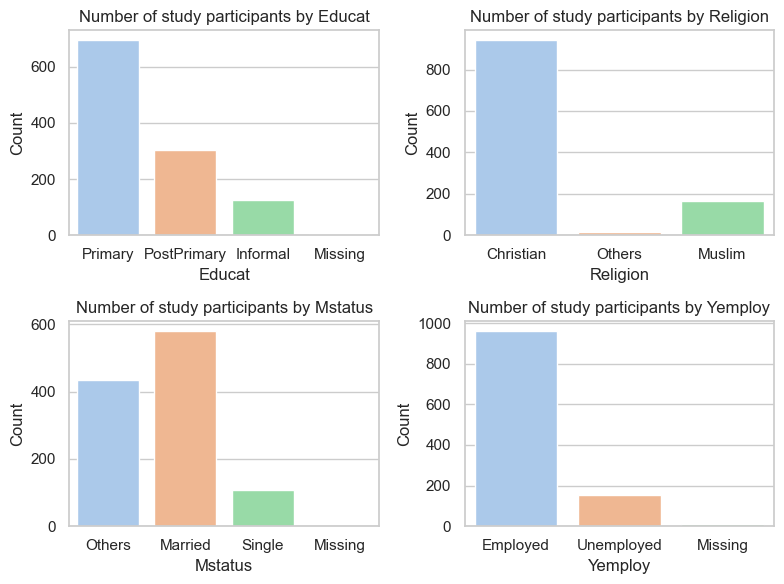

In [8]:
# List of columns with transformed categorical socio-demographic data
socio_data = ['educat', 'religion', 'mstatus', 'yemploy']

# Set the number of columns in the grid
num_cols = 2

# Calculate the number of rows needed
num_rows = math.ceil(len(socio_data) / num_cols)

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))

# Flatten the axes to iterate through them
axes = axes.flatten()

# Iterate through each categorical column and create count plots
for i, column in enumerate(socio_data):
    sns.countplot(data=df_hiv, x=column, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Number of study participants by {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(len(socio_data), num_cols * num_rows):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

We then computed the wealth index of each study participant by performing multiple correspondent analysis using responses to questions on type of dwelling and ownership of the listed durable household items. 

In [9]:
import prince
# List of columns with socio-demographic data
data = ['rentown', 'hroof', 'hfloor', 'hwall', 'poses1', 'poses2', 'poses3', 'poses4',
        'poses5', 'poses6', 'poses7', 'poses8']

# Create a subset DataFrame containing only the specified columns
df_data = df_hiv[data]

# Replace NaN with a specific value(-1)
df_data = df_data.fillna(-1)

# Drop rows with NaN values
df_data = df_data.dropna()

# Transform categorical variables using one-hot encoding
df_data_encoded = pd.get_dummies(df_data, columns=df_data.columns, drop_first=True)

# Initialize MCA
mca = prince.MCA(
    n_components=5,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit MCA on the transformed DataFrame
mca = mca.fit(df_data_encoded)

# Print eigenvalues to show variance explained
print("Eigenvalues:")
print(mca.eigenvalues_)

Eigenvalues:
[0.1535491  0.10609118 0.08211438 0.0669265  0.06145087]


In [10]:
# Calculate SES based on the first and second principal components
ses_scores = mca.row_coordinates(df_data_encoded).iloc[:, 0] + mca.row_coordinates(df_data_encoded).iloc[:, 1]

# Use pd.concat to add SES scores to the original DataFrame
df_hiv = pd.concat([df_hiv, ses_scores.rename('SES')], axis=1)

# Create categorical variable SES_cat based on terciles
df_hiv['SES_cat'] = pd.qcut(df_hiv['SES'], q=[0, 1/3, 2/3, 1], labels=['low', 'medium', 'high'])

# Display the updated DataFrame with SES scores and SES_cat
print(df_hiv[['patid', 'SES','SES_cat']].head())

        patid       SES SES_cat
0  ED6/01/001  0.386771    high
1  ED6/01/002 -0.362249     low
2  ED6/01/003 -0.233259     low
3  ED6/01/004  0.890442    high
4  ED6/01/005 -0.379108     low


C:\Users\Mutema\AppData\Local\Temp\ipykernel_9164\663264807.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_hiv['SES_cat'] = pd.qcut(df_hiv['SES'], q=[0, 1/3, 2/3, 1], labels=['low', 'medium', 'high'])


#### HIV Clinical Status


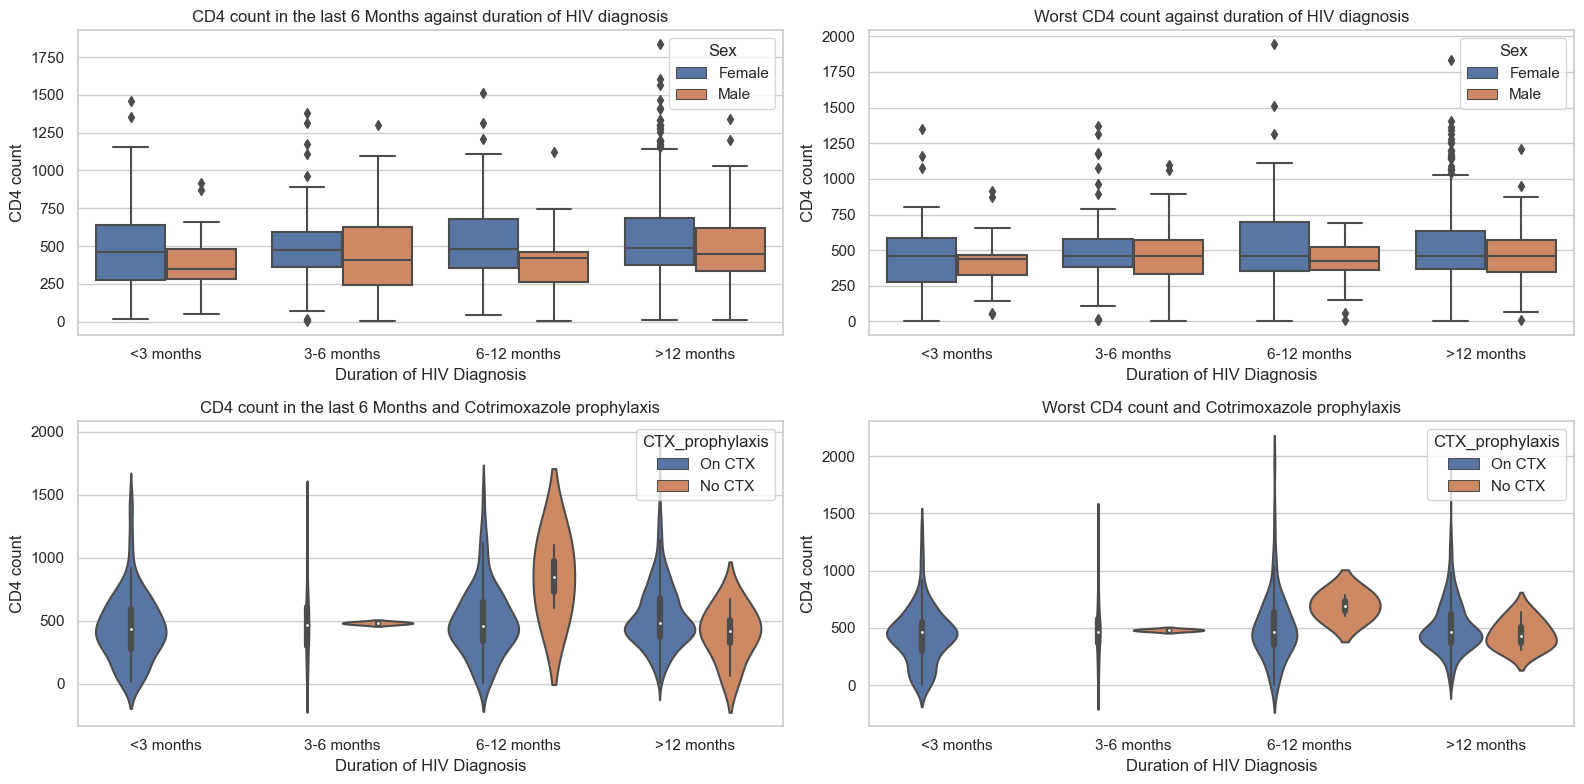

In [11]:
from sklearn.impute import SimpleImputer

# Make a copy of the df_hiv data frame
df_c = df_hiv.copy()

# Impute missing values using median for 'cd46mths' and 'cd4worst'
imputer = SimpleImputer(strategy='median')
df_c[['cd46mths', 'cd4worst']] = imputer.fit_transform(df_c[['cd46mths', 'cd4worst']])

# Exclude individuals with NaN in 'cd46mths' and 'cd4worst'
df_hiv_filtered = df_c.dropna(subset=['cd46mths', 'cd4worst'])

# Map clinic time values
clinic_time_mapping = {1: 'less than 6 months', 2: '6-12 months', 3: 'more than 12 months'}
df_c['Duration of enrollment'] = df_c['clinictime'].map(clinic_time_mapping)
#sex mapping
sex_mapping = {1: 'Male', 2: 'Female'}
df_c    ['Sex'] = df_c['sex'].map(sex_mapping)

# Map CTX prophylaxis status
CTX_mapping = {1: 'On CTX', 2: 'No CTX'}
df_c['CTX_prophylaxis'] = df_c['septin'].map(CTX_mapping)

# Map hiv date values
hiv_date_mapping = {1: '<3 months', 2: '3-6 months', 3: '6-12 months', 4: '>12 months'}
df_c['duration_of_hiv_diagnosis'] = df_c['hivdate'].map(hiv_date_mapping)

# Set the order of duration categories
duration_order = ['<3 months', '3-6 months', '6-12 months', '>12 months']

# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

# Plot for 'cd46mths'
sns.boxplot(
    x='duration_of_hiv_diagnosis',
    y='cd46mths',
    hue='Sex',
    data=df_c,
    ax=axes[0,0],
    order=duration_order
)
axes[0,0].set_xlabel('Duration of HIV Diagnosis')
axes[0,0].set_ylabel('CD4 count')
axes[0,0].set_title('CD4 count in the last 6 Months against duration of HIV diagnosis')

# Plot for 'cd4worst'
sns.boxplot(
    x='duration_of_hiv_diagnosis',
    y='cd4worst',
    hue='Sex',
    data=df_c,
    ax=axes[0,1],
    order=duration_order
)
axes[0,1].set_xlabel('Duration of HIV Diagnosis')
axes[0,1].set_ylabel('CD4 count')
axes[0,1].set_title('Worst CD4 count against duration of HIV diagnosis')

# Plot for 'cd46mths' with CTX_prophylaxis
sns.violinplot(
    x='duration_of_hiv_diagnosis',
    y='cd46mths',
    hue='CTX_prophylaxis',
    data=df_c,
    ax=axes[1,0],
    order=duration_order
)
axes[1,0].set_xlabel('Duration of HIV Diagnosis')
axes[1,0].set_ylabel('CD4 count')
axes[1,0].set_title('CD4 count in the last 6 Months and Cotrimoxazole prophylaxis')

# Plot for 'cd4worst' with CTX_prophylaxis
sns.violinplot(
    x='duration_of_hiv_diagnosis',
    y='cd4worst',
    hue='CTX_prophylaxis',
    data=df_c,
    ax=axes[1,1],
    order=duration_order
)
axes[1,1].set_xlabel('Duration of HIV Diagnosis')
axes[1,1].set_ylabel('CD4 count')
axes[1,1].set_title('Worst CD4 count and Cotrimoxazole prophylaxis')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Psychosocial imapirement
We computed the psycho-social impairment index for each participant by first converting the responses to 1 if greater than 0, and 0 otherwise for each of the selected columns then we summed up across the rows to generate a composites score.

In [12]:
columns_to_convert = ['disrupt', 'healthvisit', 'hospdays']

df_hiv[columns_to_convert] = df_hiv[columns_to_convert].apply(lambda x: (x > 0).astype(int))

PsycSocImpairment = df_hiv[columns_to_convert].sum(axis=1, skipna=True)

### Social Support index
We also computed and created a column for social support score using the multi-dimensional perceived social support calculation and created a categorical variable called SocSupport_cat. Respondents with a mean score of 1-2.9 are categorized as having low social support while those with a mean score of 3-5 are consider as moderate and those with a score of 5.1 to 7 as having high social support. Reference (Zimet GD, Dahlem NW, Zimet SG, Farley GK. The Multidimensional Scale of Perceived Social Support. Journal of Personality Assessment 1988;52:30-41).

In [13]:
Soc_col = ['socneed', 'socjoy', 'socreal', 'socemot', 'soccomfo', 'socfriend',
           'socthing', 'socprob', 'socshare', 'soclife', 'socwill', 'soctalk']

# Compute SS_score without modifying the original DataFrame
SocSupport = pd.concat([df_hiv[col].fillna(0) for col in Soc_col], axis=1).sum(axis=1) / len(Soc_col)

# Compute SS_cat without modifying the original DataFrame
SocSupport_cat = pd.cut(SocSupport,
               bins=[-float('inf'), 2.9, 5, float('inf')],
               labels=['low','moderate','high'],
               include_lowest=True)

Concatenate the newly created variables with the original data frame

In [14]:
# Concatenate the new Series to the original DataFrame
df_hiv = pd.concat([df_hiv, PsycSocImpairment.rename('PsycSocImp'), SocSupport.rename('SocSupport'), SocSupport_cat.rename('SocSupport_cat')], axis=1)

#### Stress Score 


We computed the number of negative life events in the past 6 months for each study participant

In [15]:

NE_col = ['father', 'mother', 'parentill', 'parmisunder', 'parneglect', 'brother',
          'sister', 'siblingill', 'siblingmis', 'siblingneg', 'spouse', 'lover',
          'spoloverill', 'spolovmis', 'spolovneg', 'child', 'childill', 'childmis',
          'childcare', 'ill', 'anymis', 'feelneg', 'famprov', 'jobloss', 'discrim',
          'cope', 'moneywor']

# Create a subset DataFrame df_NE containing only the specified columns for negative life events
df_NE = df_hiv[NE_col].copy()

# Calculate the number of negative life events (NE) for each participant by summing across rows where the response is 1
Neg_Events = np.nansum(df_NE.values == 1, axis=1)

# Define custom cutoff points
custom_cutoffs_ne = [-1, 0, 3, 9, float('inf')]  # Adjusted for proper binning

# Create categories for study participants based on custom cutoff points
category_labels_ne = ["None", "1-3", "4-9",">=10"]

# Create a temporary DataFrame for the first code chunk
df_temp_ne = pd.DataFrame({'Neg_Events': Neg_Events, 'NumNegEvents': pd.cut(Neg_Events, bins=custom_cutoffs_ne, labels=category_labels_ne, include_lowest=True)})


print("\nThe number of Participants per Category:\n", df_temp_ne['NumNegEvents'].value_counts())



The number of Participants per Category:
 NumNegEvents
4-9     457
1-3     390
None    141
>=10    138
Name: count, dtype: int64


We computed and created a new column for the stress score by summing responses to how stressful the adverse life events were for each participant.

In [16]:
list_b = ['fathst', 'mothst', 'parst', 'parmisst', 'parnegst', 'brost',
          'sisst', 'siblingst', 'sibmisst', 'sibnegst', 'spouset', 'loverst',
          'spolovillst', 'spolovmisst', 'spolovnegst', 'childst', 'childillst',
          'childmisst', 'childcarest', 'illst', 'anymisrelst', 'feelnegst', 'famprovst',
          'joblossst', 'discrimst', 'copest', 'moneyworst']

# Create a subset DataFrame df_b containing only the columns from list_b
df_b = df_hiv[list_b].copy()

# Sum values in each row for selected columns, handling NaN values appropriately
row_sums = np.nansum(df_b.values, axis=1)

# Add the result as a new column "StressScore" to df_hiv
StressScore = row_sums

# Convert 'StressScore' into categorical variables based on custom cutoffs
custom_cutoffs_ssi = [-1, 0, 3, 9, float('inf')]
labels_ssi = ["None","1-4","5-9",">=10"]

# Create a temporary DataFrame for this code chunk
df_temp_ssi = pd.DataFrame({'StressScore': StressScore, 'StressScore_cat': pd.cut(StressScore, bins=custom_cutoffs_ssi, labels=labels_ssi, include_lowest=True)})

print("\nNumber of Participants per Category:\n", df_temp_ssi['StressScore_cat'].value_counts())




Number of Participants per Category:
 StressScore_cat
5-9     439
1-4     270
>=10    253
None    164
Name: count, dtype: int64


In [17]:
# Concatenate the temporary DataFrames to the original DataFrame
df_hiv = pd.concat([df_hiv, df_temp_ne, df_temp_ssi], axis=1)

#print(df_hiv[[ 'NE_cat','Neg_Events', 'SSI_cat','SSI' ]].head())

### Sheehan's disability scale (SDS)
we computed sheehan's disability score(sds) for each study participant and created a new categorical variable based on the cut offs for severity.

In [18]:
# Calculate 'Sheehan's Disability Score' and 'SDS_cat'
SDS = df_hiv[['dayslost', 'daysunproductive']].sum(axis=1, skipna=True, min_count=1)

# Define custom cutoff points for 'SDS_cat'
custom_cutoffs_sds = [-float('inf'), 0, 6, 12, float('inf')]
labels_sds = ["None","Low","Moderate","High"]

# Create a temporary DataFrame for 'SDS' and 'SDS_cat'
df_temp_sds = pd.DataFrame({'SDS': SDS, 'SDS_category': pd.cut(SDS, bins=custom_cutoffs_sds, labels=labels_sds, include_lowest=True)})

# Concatenate the temporary DataFrame to the original DataFrame
df_hiv = pd.concat([df_hiv, df_temp_sds], axis=1)

# Display the updated DataFrame
print(df_hiv[['SDS','SDS_category']].head())

   SDS SDS_category
0  0.0         None
1  9.0     Moderate
2  6.0          Low
3  0.0         None
4  0.0         None


### CES-D (Center for Epidemiologic Studies Depression Scale)
We replaced NA values in the CES-D score category with either 1 for depressed or 2 for not depressed using a cut off score of 16 on the 20 item version of the Center for Epidemiologic Studies Depression Scale (CES-D).

In [19]:

df_hiv['cscor'] = pd.to_numeric(df_hiv['cscor'], errors='coerce')

# Update cscorcat based on the cutoff of 16
df_hiv['cscorcat'] = np.select([np.isnan(df_hiv['cscor']), df_hiv['cscor'] >= 16], [0, 1], default=2)


#### Mini-Plus for the diagnosis of Suicidality

We computed the severity of Suicidality for each study participant based on the diagnosis label assigned in the original data. We also created a categorical variable based on the scores obtained on the B items in the MINI Plus for suicidality.

In [20]:
ms_columns = ['msacc', 'mshurt', 'msdie', 'mshope', 'msdead', 'mswharm', 'mssuic',
              'msplan', 'mssteps', 'msharm', 'msattempt', 'msrescue', 'msattdie', 'msattever']

# Define a custom function to replace NaN or 2 with 0
def replace_values(x):
    return 0 if pd.isna(x) or x == 2 else x

# Apply the custom function to specified columns
df_hiv[ms_columns] = df_hiv[ms_columns].applymap(replace_values)

# Compute the severity of suicidality using rows where msdiag == 1, set others to NaN
df_hiv['msseverity'] = np.where(df_hiv['msdiag'] == 1, df_hiv[ms_columns].sum(axis=1), np.nan)

# Define custom cutoffs for severity categories
severity_cutoffs = [1, 8, 16, float('inf')]

# Define a custom function to create the 'mhs_cat' column 
def create_mhs_cat(severity_column, cutoffs, labels):
    return pd.cut(severity_column, bins=cutoffs, labels=labels, include_lowest=True)

# Apply the custom function to create 'mhs_cat' column
df_hiv['mhs_cat'] = create_mhs_cat(df_hiv['msseverity'], severity_cutoffs, ['Low', 'Moderate', 'High'])

# Count the number of participants with a positive diagnosis of suicidality (msdiag=1)
count_msdiag_1 = df_hiv['msdiag'].eq(1).sum()

# Display the resulting DataFrame and count of participants per category
#print(df_hiv[['msdiag', 'msseverity', 'mhs_cat']].head())
print(f"\n There are {count_msdiag_1} participants with a positive diagnosis of suicidality")

# Count the number of participants per msseverity category
category_counts = df_hiv['mhs_cat'].value_counts()
print("\nThe number of Participants per Suicidality severity category:\n", category_counts)



 There are 136 participants with a positive diagnosis of suicidality

The number of Participants per Suicidality severity category:
 mhs_cat
Low         122
Moderate     11
High          0
Name: count, dtype: int64


C:\Users\Mutema\AppData\Local\Temp\ipykernel_9164\1411013337.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_hiv['mhs_cat'] = create_mhs_cat(df_hiv['msseverity'], severity_cutoffs, ['Low', 'Moderate', 'High'])


However, close examination of data indicated instances of mislabelling. We therefore, recomputed the Mini diagnosis for each study participant using the responses in the MINI plus interview.


There are 207 participants with a positive diagnosis of suicidality

The number of participants per Suicidality severity Category:
 mhs_cat1
Low         196
Moderate     11
High          0
Name: count, dtype: int64


C:\Users\Mutema\AppData\Local\Temp\ipykernel_9164\26679976.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Diagnosis'] = df['mhsdiag'].map(legend_mapping)
C:\Users\Mutema\AppData\Local\Temp\ipykernel_9164\26679976.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_hiv['phenotype'] = df_hiv['mhsdiag'].apply(lambda x: 2 if x == 1 else 1)


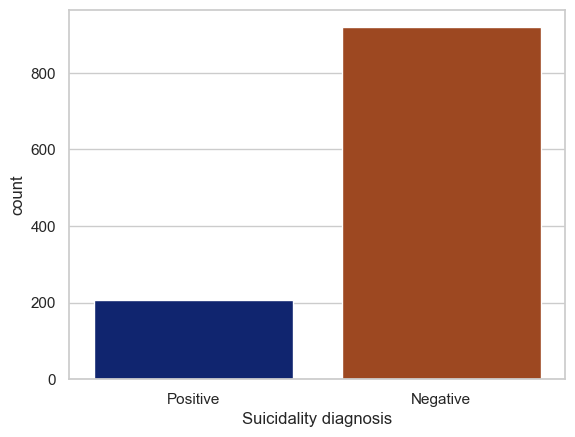

In [21]:
# Function to create a legend mapping for mhsdiag
def create_diagnosis_legend(df):
    legend_mapping = {1: 'Positive', 2: 'Negative'}
    df['Diagnosis'] = df['mhsdiag'].map(legend_mapping)

# Function to check if any item in sublist has a response of 1 and set mhsdiag accordingly
def set_mhsdiag(df, sublist_columns):
    # Create a temporary DataFrame to store the result
    df_temp = pd.DataFrame()

    # Check if any item in sublist has a response of 1
    df_temp['mhsdiag'] = df[sublist_columns].eq(1).any(axis=1).astype(int)
    
    df_temp.loc[~df_temp['mhsdiag'].astype(bool), 'mhsdiag'] = 2

    # Concatenate the temporary DataFrame with the original DataFrame
    df = pd.concat([df, df_temp], axis=1)

    return df

# Function to compute severity, handle NaN values, and categorize if mhsdiag is equal to 1
def compute_mhsseverity(df, ms_columns, mhsdiag_column):
    df_temp = pd.DataFrame()

    if mhsdiag_column in df.columns:
        # Compute severity by summing selected columns where the response is 1
        df_temp['mhsseverity'] = df.loc[df[mhsdiag_column] == 1, ms_columns].eq(1).sum(axis=1)

        # Handle NaN values in severity
        df_temp['mhsseverity'] = df_temp['mhsseverity'].fillna(0)

        # Define custom cutoffs for severity categories
        severity_cutoffs = [1, 8, 16, float('inf')]

        # Create categories for severity based on the custom cutoff points
        df_temp['mhs_cat1'] = pd.cut(df_temp['mhsseverity'], bins=severity_cutoffs, labels=['Low', 'Moderate', 'High'], include_lowest=True)

        # Display the resulting DataFrame
        # print(df_temp[['mhsseverity', 'mhs_cat1']].head())

        # Count the number of individuals in each severity category
        category_counts = df_temp['mhs_cat1'].value_counts()
        print("\nThe number of participants per Suicidality severity Category:\n", category_counts)
    else:
        print(f"Column '{mhsdiag_column}' not found in the DataFrame.")

    return df_temp


# Select columns for computing severity of suicidality diagnosis
ms_columns = ['msacc', 'mshurt', 'msdie', 'mshope', 'msdead', 'mswharm', 'mssuic', 'msplan',
              'mssteps', 'msharm', 'msattempt', 'msrescue', 'msattdie', 'msattever']

# Select columns for computing suicidality diagnosis
sublist_ms_columns = ['mshope', 'msdead', 'mswharm', 'mssuic', 'msplan', 'mssteps', 'msharm',
                      'msattempt', 'msrescue', 'msattdie', 'msattever']

# Apply function to set mhsdiag based on sublist columns
df_hiv = set_mhsdiag(df_hiv, sublist_ms_columns)

# Display the count of participants with a positive diagnosis of suicidality (mhsdiag=1)
count_mhsdiag = df_hiv['mhsdiag'].eq(1).sum()
print(f"\nThere are {count_mhsdiag} participants with a positive diagnosis of suicidality")

# Apply function to create a legend mapping for mhsdiag
create_diagnosis_legend(df_hiv)

# Plot countplot with legend
sns.countplot(x='mhsdiag', data=df_hiv, palette='dark')

# Modify x-axis labels
plt.xticks(ticks=[1, 0], labels=['Negative', 'Positive'], rotation=0)
plt.xlabel('Suicidality diagnosis')

# Apply function to compute mhsseverity
df_temp = compute_mhsseverity(df_hiv, ms_columns, 'mhsdiag')

# Concatenate the temporary DataFrame to the original DataFrame
df_hiv = pd.concat([df_hiv, df_temp], axis=1)

# Create case_control column based on mhsdiag values
df_hiv['phenotype'] = df_hiv['mhsdiag'].apply(lambda x: 2 if x == 1 else 1)

plt.show()


We visualized the distribution of study participants by the outcome of suicidaility diagnosis category.

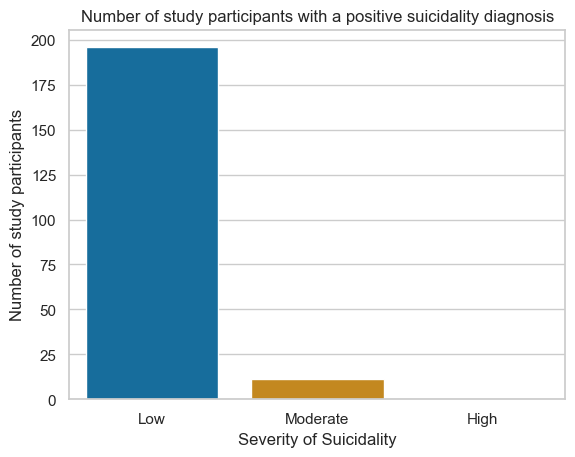

In [22]:

# Create a countplot using seaborn
sns.countplot(x='mhs_cat1', data=df_hiv, palette='colorblind')

# Add labels and title
plt.ylabel('Number of study participants')
plt.xlabel('Severity of Suicidality')
plt.title('Number of study participants with a positive suicidality diagnosis')

# Display the plot
plt.show()


### Feature selection

In [23]:
# Exclusion criteria
# We filtered the data to exclude all individuals that were less than 18 years of age at the time of the study.
df_hiv = df_hiv[(df_hiv['dobb'] >= 18) ]

#Remove constant columns from the data frame
df_hiv = df_hiv.loc[:, df_hiv.nunique() > 1]

# Drop variables where more than 95% of the values are missing
threshold = 0.95  
df_hiv = df_hiv.dropna(thresh=len(df_hiv) * (1 - threshold), axis=1)
# Display the dimensions of the filtered DataFra
df_hiv.shape

(1121, 276)

Bi-variate analysis

In [24]:
# Select variables excluding all those that are components of the computed variables
df_select = df_hiv[['studsite','sex', 'dobb', 'educat','religion','mstatus','food', 'yemploy', 'hivdate','clinictime',
                    'cd4worst','cd4done','cd46mths', 'weightst1','septin', 'septrinmiss', 'sexom', 'sexeg',
                    'sexforced', 'sexolder', 'sexunknown', 'sexstd', 'conduse', 'prevpsyc','psycfam','dementiasco',
                    'maxscore','cscor','cscorcat', 'whostagone', 'whostagetwo', 'whostagethree','stage4fol',
                    'mddcurdiag','mddprev','mdppast','SES','SES_cat','PsycSocImp','SocSupport',
                    'SocSupport_cat','Neg_Events','NumNegEvents','StressScore','StressScore_cat','SDS','SDS_category'
                    ,'mhsdiag']].copy()

Examine the distribution of the numeric variables

In [25]:
#select numerical variables
num_var = ['dobb', 'cd4worst','cd46mths', 'weightst1', 'dementiasco', 'maxscore',
           'cscor','SES', 'PsycSocImp','SocSupport', 'Neg_Events', 'StressScore','SDS']

# Create a subset DataFrame with only numerical variables
df_num_subset = df_select[num_var]

# Use describe() on the subset
df_num_subset.describe()


,dobb,cd4worst,cd46mths,weightst1,dementiasco,maxscore,cscor,SES,PsycSocImp,SocSupport,Neg_Events,StressScore,SDS
count,1121.000000,1041.000000,1107.000000,1082.000000,1113.000000,1112.000000,1110.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1113.000000
mean,35.160571,500.937560,515.818428,60.128098,9.422912,10.064748,11.608108,0.000860,0.634255,3.093815,4.588760,6.016057,2.132974
std,9.272612,250.669455,269.064158,10.024508,1.563847,3.266906,11.283482,0.510510,0.933525,0.631755,3.796311,5.362045,4.458070
min,18.000000,1.000000,2.000000,30.000000,0.800000,1.000000,0.000000,-1.292933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,354.000000,351.500000,53.000000,8.500000,8.000000,3.000000,-0.314664,0.000000,2.666667,2.000000,2.000000,0.000000
50%,34.000000,460.000000,470.000000,60.000000,10.000000,10.000000,8.500000,-0.029105,0.000000,3.166667,4.000000,5.000000,0.000000
75%,40.000000,633.000000,664.500000,66.000000,10.500000,12.000000,19.000000,0.291697,1.000000,3.583333,7.000000,9.000000,2.000000
max,82.000000,1944.000000,1835.000000,100.000000,16.000000,22.000000,98.000000,1.769505,3.000000,4.000000,21.000000,30.000000,58.000000


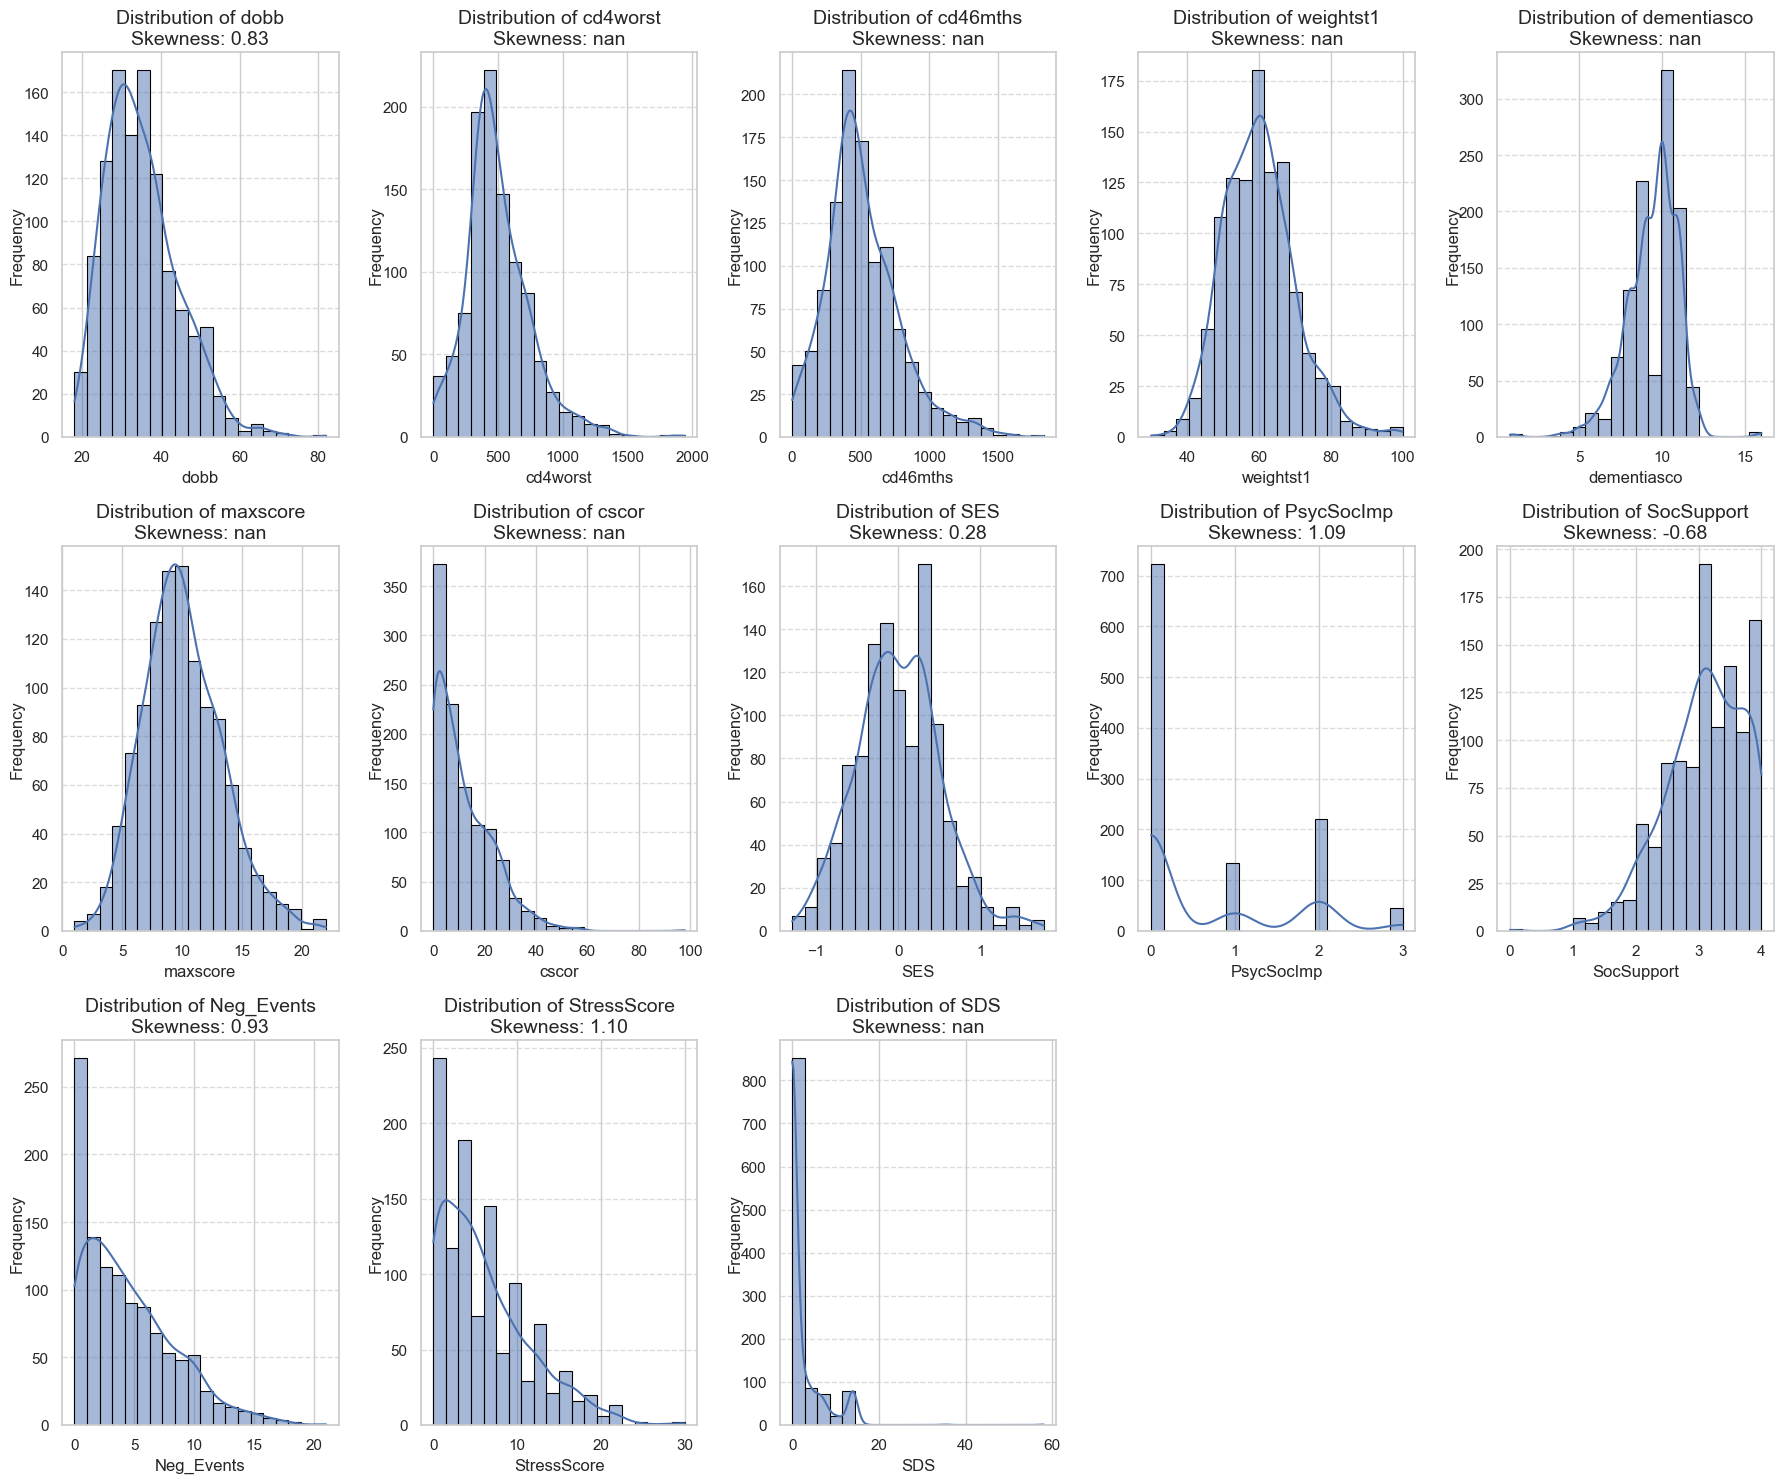

In [26]:
from scipy.stats import skew

# Create subplots with 3 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 15))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop through each variable and create a subplot
for i, variable in enumerate(num_var):
    if i < len(axes):  # Ensure we don't exceed the number of available subplots
        sns.histplot(data=df_num_subset, x=variable, bins=20, edgecolor='black', kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {variable}\nSkewness: {skew(df_num_subset[variable]):.2f}', fontsize=14, ha='center')
        axes[i].set_xlabel(f'{variable}', fontsize=12, ha='center')
        axes[i].set_ylabel('Frequency', fontsize=12, va='center')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any remaining empty subplots
for j in range(len(num_var), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Perform correlation analysis on the selected numerical variables

In [27]:
from tabulate import tabulate

# List of non-categorical independent variables and outcome
num_var = ['dobb', 'cd4worst','cd46mths', 'weightst1', 'dementiasco', 'maxscore','cscor',
           'SES', 'PsycSocImp','SocSupport', 'Neg_Events', 'StressScore','SDS','mhsdiag']

# Make a shallow copy of the original data by selecting specific columns
df_corr = df_hiv[num_var].copy()

# Check for missing values and impute if needed
if df_corr.isnull().values.any():
    # Impute missing values
    df_corr[num_var] = df_corr[num_var].fillna(df_corr[num_var].median())

# Perform lognormal transformation (excluding 'mhsdiag')
for var in num_var[:-1]:  # Exclude 'mhsdiag'
    # Exclude NaN or negative values before transformation
    valid_values = df_corr[var].dropna()  # Exclude NaN values
    valid_values = valid_values[valid_values > 0]  # Exclude negative values
    df_corr[var] = np.log1p(valid_values)

# Initialize a list to store correlation results
correlation_results = []

# Calculate point-biserial correlation with mhsdiag
for var in num_var[:-1]:  # Exclude 'mhsdiag' from the loop
    correlation = df_corr[var].corr(df_corr['mhsdiag'])
    correlation_results.append([var, correlation])

# Sort results based on correlation values in descending order
correlation_results.sort(key=lambda x: x[1], reverse=True)

# Print results in a neat table format
print(tabulate(correlation_results, headers=["Variable", "Correlation with mhsdiag"], tablefmt="pretty"))


+-------------+--------------------------+
|  Variable   | Correlation with mhsdiag |
+-------------+--------------------------+
| SocSupport  |   0.11490279759038423    |
|    dobb     |   0.04103278731643399    |
|  maxscore   |   0.036619583807035797   |
| dementiasco |   0.027197899501322526   |
|  weightst1  |   0.015253359817223906   |
|  cd46mths   |   0.012595400436012595   |
|  cd4worst   |   0.012578104763808533   |
|     SES     |  0.0035922225514041775   |
|     SDS     |   -0.07753110896186154   |
| PsycSocImp  |   -0.12634105694143724   |
| Neg_Events  |   -0.24517588597972118   |
| StressScore |   -0.2576198352375304    |
|    cscor    |   -0.2980902440950808    |
+-------------+--------------------------+


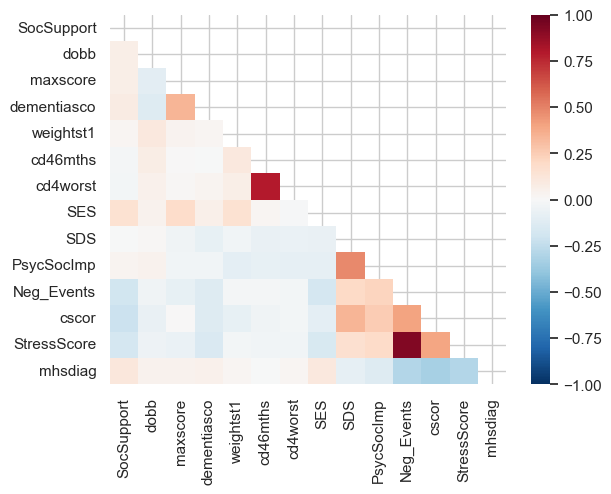

In [28]:

# List of numerical variables

num_var = ['SocSupport','dobb','maxscore', 'dementiasco','weightst1','cd46mths','cd4worst',
           'SES','SDS','PsycSocImp','Neg_Events', 'cscor','StressScore','mhsdiag']
# Select relevant columns from the dataframe
df_corr1 = df_hiv[num_var].copy()

# Check for missing values and impute if needed
if df_corr1.isnull().values.any():
    # Impute missing values
    df_corr1[num_var] = df_corr1[num_var].fillna(df_corr1[num_var].median())

# Generate a correlation matrix including the binary outcome variable
corr_matrix = df_corr1.corr(method='pearson')

# Create a mask to hide the upper triangular part of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure()

# Create a heatmap with the mask applied
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="RdBu_r", mask=mask, vmin=-1, vmax=1)

# Show the plot
plt.show()


In [29]:
# Find highly correlated variables in the data and prune one of the correlated variables
highly_correlated_tuples = []
variables_to_prune = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        correlation = corr_matrix.iloc[i, j]
        if abs(correlation) >= 0.5:
            col_name_1, col_name_2 = corr_matrix.columns[i], corr_matrix.columns[j]
            highly_correlated_tuples.append((col_name_1, col_name_2, correlation))
            # Prune the second variable in the pair
            variables_to_prune.add(col_name_2)  

# Print the final set of highly correlated variables
for col1, col2, correlation in highly_correlated_tuples:
    print(f"'{col1}' and '{col2}' have a correlation of {correlation:.2f}")

# Print out the set of variables to be dropped
print("Variables to prune:", variables_to_prune)

# Drop columns in the set of variables_to_prune
df_cleaned = df_corr1.drop(columns=variables_to_prune)

'cd4worst' and 'cd46mths' have a correlation of 0.79
'StressScore' and 'Neg_Events' have a correlation of 0.92
Variables to prune: {'Neg_Events', 'cd46mths'}


Perform correlation analysis on categorical variables

In [30]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

outcome = 'mhsdiag'

# Set p-value threshold
p_value_threshold = 0.05  

# Select categorical variables of interest
categorical_columns = ['studsite', 'sex', 'educat', 'religion', 'mstatus', 'food', 'yemploy', 'hivdate',
                       'clinictime', 'cd4done', 'septin', 'septrinmiss', 'sexom', 'sexeg',
                       'sexforced', 'sexolder', 'sexunknown', 'sexstd', 'conduse', 'psycfam',
                       'whostagone', 'whostagetwo', 'whostagethree', 'stage4fol', 'mddcurdiag','StressScore_cat',
                       'mdppast', 'SDS_category', 'SocSupport_cat','SES_cat']

# Create a copy of the DataFrame to avoid modifying the original data
df_chi2 = df_hiv.copy()

# Apply label encoding to categorical variables
label_encoder = LabelEncoder()
df_chi2[categorical_columns] = df_chi2[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

# Perform Chi-square test
chi2_stat, p_values = chi2(df_chi2[categorical_columns], df_chi2[outcome])

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'Variable': categorical_columns, 'Chi2_Statistic': chi2_stat, 'P-Value': p_values})

# Filter variables based on the p-value threshold
significant_variables = chi2_results[chi2_results['P-Value'] < p_value_threshold]

# Print results in a neat table format
print(tabulate(significant_variables.sort_values(by='P-Value'), headers='keys', tablefmt='pretty'))


+----+-----------------+-------------------+------------------------+
|    |    Variable     |  Chi2_Statistic   |        P-Value         |
+----+-----------------+-------------------+------------------------+
| 24 |   mddcurdiag    | 35.11557442740068 | 3.1070584232864434e-09 |
| 5  |      food       | 9.007995999249916 |  0.002688009908031426  |
| 25 | StressScore_cat | 4.256797318549669 |  0.03909355929661696   |
| 4  |     mstatus     | 4.188913339242439 |  0.04068917058742945   |
| 28 | SocSupport_cat  | 4.109470089879469 |   0.0426437218709288   |
+----+-----------------+-------------------+------------------------+


Feature selection

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer

# Select variables excluding numerical variables
cat_var = ['studsite', 'sex', 'educat', 'religion', 'mstatus', 'food', 'yemploy', 
           'clinictime', 'psycfam','mddcurdiag','mdppast', 'SES_cat',
           'SocSupport_cat','StressScore_cat', 'SDS_category']

num_var = ['SocSupport','dobb','maxscore', 'dementiasco','weightst1','cd46mths','PsycSocImp']

# Create DataFrame with selected variables
df_select = df_hiv[['mhsdiag'] + cat_var + num_var].copy()

# Split the data into features and target variable
X = df_select.drop(columns=['mhsdiag'])
y = df_select['mhsdiag']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical variables
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_var),
        ('cat', categorical_transformer, cat_var)
    ])

# Append Lasso regression model to preprocessing pipeline for feature selection
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.001))  # Adjust alpha as needed
])

# Fit Lasso regression model
lasso_model.fit(X_train, y_train)

# Get selected features based on Lasso regression
selected_features = SelectFromModel(lasso_model.named_steps['lasso']).get_support()

# Print selected features
print("Selected Features:")
for feature, selected in zip(X.columns, selected_features):
    if selected:
        print(feature)


Selected Features:
studsite
sex
educat
religion
food
yemploy
clinictime
mddcurdiag
SES_cat
StressScore_cat
dobb
maxscore
dementiasco


### Features engineering and transformation

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np

# Select columns of interest
selected_columns = ['studsite','sex','dobb','educat','religion','mstatus','yemploy',
                    'clinictime','food','SES_cat', 'mddcurdiag','StressScore_cat',
                    'SocSupport_cat',  'SDS','cd46mths', 'weightst1','dementiasco',
                    'maxscore', 'SocSupport','StressScore', 'mhsdiag']

# Subset the DataFrame with selected columns
df_baseline = df_hiv[selected_columns]

# Separate features and target
X = df_baseline.drop('mhsdiag', axis=1)
y = df_baseline['mhsdiag']

# Apply label encoding to the target variable 'y'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical variables
num_var=['dobb','cd46mths', 'weightst1', 'dementiasco', 'maxscore','SDS','SocSupport']

category_var = ['studsite','sex','educat','religion', 'food','mstatus','yemploy','mddcurdiag',
                'SES_cat','clinictime','StressScore_cat','SocSupport_cat']

# Define transformers
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Apply transformations
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_var),
    ("cat", categorical_transformer, category_var)
])

# Define SMOTE as a step in the pipeline
smote = SMOTE(random_state=42)

# Create the final pipeline with SMOTE
pipeline_with_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote)
])

# Fit and transform the training data with SMOTE
X_train_transformed_smote, y_train_smote = pipeline_with_smote.fit_resample(X_train, y_train)

# Apply transformations to the test data using the preprocessor
X_test_transformed = pipeline_with_smote.named_steps['preprocessor'].transform(X_test)

# Check for any missing values in the transformed test data
if np.isnan(X_test_transformed).any():
    # Impute missing values using the same strategy as in the training data
    X_test_transformed = pipeline_with_smote.named_steps['preprocessor'].transform(X_test)


Logistic regression

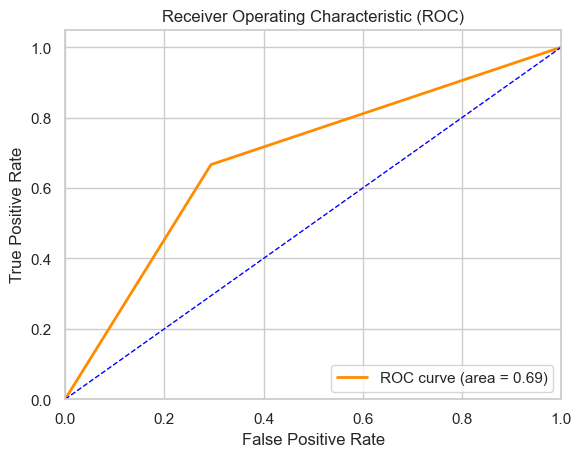

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.71      0.50        51
           1       0.89      0.67      0.76       174

    accuracy                           0.68       225
   macro avg       0.63      0.69      0.63       225
weighted avg       0.77      0.68      0.70       225

Confusion Matrix:
 [[ 36  15]
 [ 58 116]]
Intercept: -0.3689368752229186


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

# Create and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

logreg_model.fit(X_train_transformed_smote, y_train_smote)

# Get the coefficients and intercept
coefficients = logreg_model.coef_[0]
intercept = logreg_model.intercept_[0]

# Get feature names from the preprocessor
numeric_feature_names = preprocessor.transformers_[0][2]
categorical_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(input_features=category_var)
feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test_transformed)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, logreg_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print classification report, confusion matrix, MCC, and Kappa
logreg_classification_report = classification_report(y_test, logreg_predictions)
logreg_conf_matrix = confusion_matrix(y_test, logreg_predictions)

print("Logistic Regression Classification Report:\n", logreg_classification_report)
print("Confusion Matrix:\n", logreg_conf_matrix)
# Print the intercept
intercept = logreg_model.intercept_[0]
print("Intercept:", intercept)


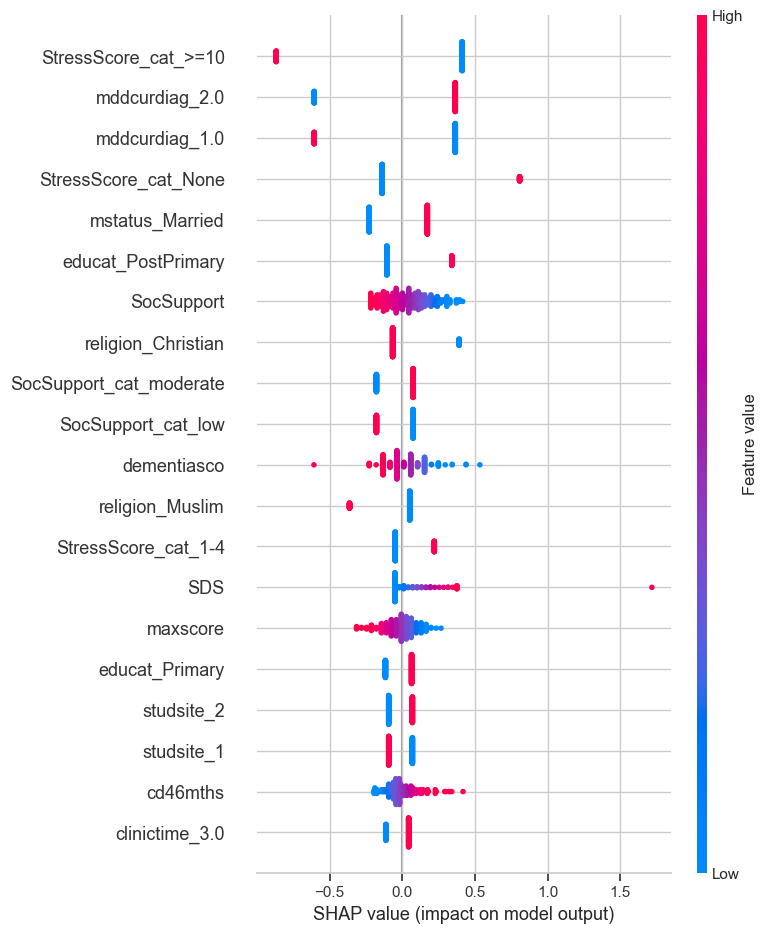

In [34]:
import shap

# Initialize an explainer object with the logistic regression model and training data
explainer = shap.Explainer(logreg_model, X_train_transformed_smote)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_transformed)

# Summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}


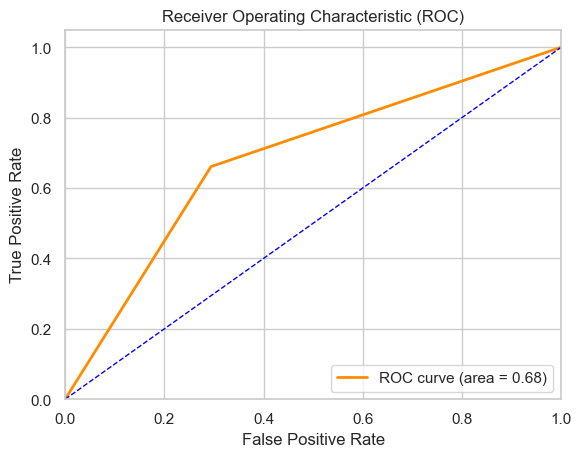

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.71      0.49        51
           1       0.88      0.66      0.76       174

    accuracy                           0.67       225
   macro avg       0.63      0.68      0.62       225
weighted avg       0.77      0.67      0.70       225

Confusion Matrix:
 [[ 36  15]
 [ 59 115]]


In [35]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']  # Regularization penalty
}

# Create the grid search object
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=1000),
                           param_grid=param_grid,
                           scoring='roc_auc',  # Use ROC AUC as the scoring metric
                           cv=5)  # 5-fold cross-validation

# Perform grid search on the training data
grid_search.fit(X_train_transformed_smote, y_train_smote)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
logreg_predictions = best_model.predict(X_test_transformed)

# Compute ROC curve and AUC for the best model
fpr, tpr, thresholds = roc_curve(y_test, logreg_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print classification report, confusion matrix, MCC, and Kappa for the best model
logreg_classification_report = classification_report(y_test, logreg_predictions)
logreg_conf_matrix = confusion_matrix(y_test, logreg_predictions)

print("Logistic Regression Classification Report:\n", logreg_classification_report)
print("Confusion Matrix:\n", logreg_conf_matrix)

Support vector machines

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.41      0.38        51
           1       0.82      0.78      0.80       174

    accuracy                           0.70       225
   macro avg       0.59      0.60      0.59       225
weighted avg       0.71      0.70      0.71       225

Confusion Matrix:
 [[ 21  30]
 [ 38 136]]


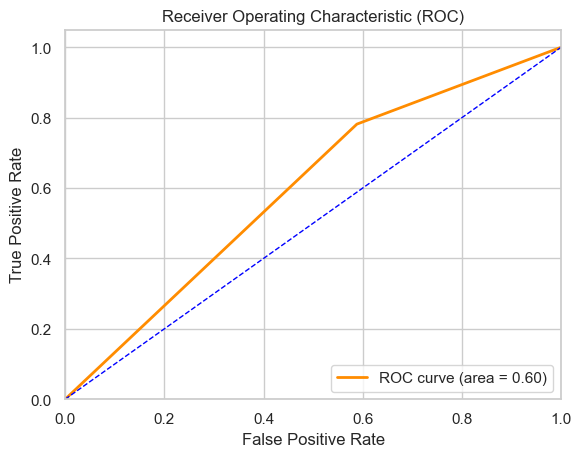

In [36]:
from sklearn.svm import SVC

# Create and train the Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)

svm_model.fit(X_train_transformed_smote, y_train_smote)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test_transformed)

# Evaluate the model
svm_classification_report = classification_report(y_test, svm_predictions)

# Confusion Matrix
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)


# Print metrics
print("SVM Classification Report:\n", svm_classification_report)
print("Confusion Matrix:\n", svm_conf_matrix)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, svm_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

PermutationExplainer explainer: 226it [13:09,  3.56s/it]                         


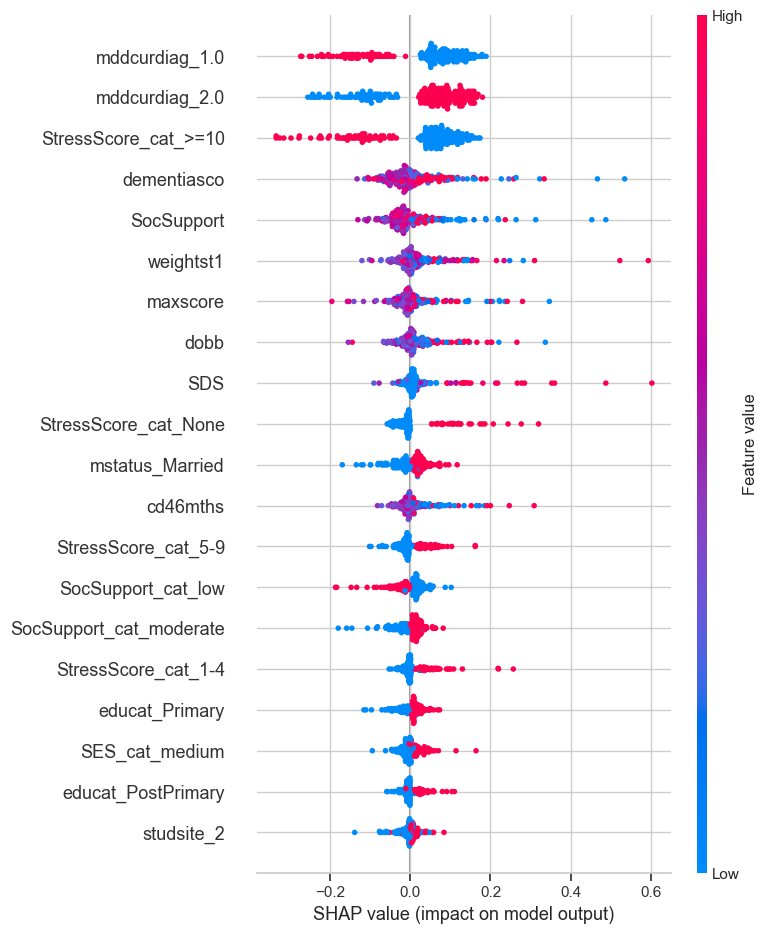

In [37]:
import shap
from sklearn.svm import SVC

# Define a function to make predictions using the SVM model
def predict_fn(x):
    return svm_model.predict(x)

# Create and train the Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_transformed_smote, y_train_smote)

# Create a SHAP explainer
explainer = shap.Explainer(predict_fn, X_train_transformed_smote)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test_transformed)

# Get feature names from the preprocessor
numeric_feature_names = num_var
categorical_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(input_features=category_var)
feature_names = numeric_feature_names + list(categorical_feature_names)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.77      1.00      0.87       174

    accuracy                           0.77       225
   macro avg       0.39      0.50      0.44       225
weighted avg       0.60      0.77      0.67       225

Confusion Matrix:
 [[  0  51]
 [  0 174]]


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


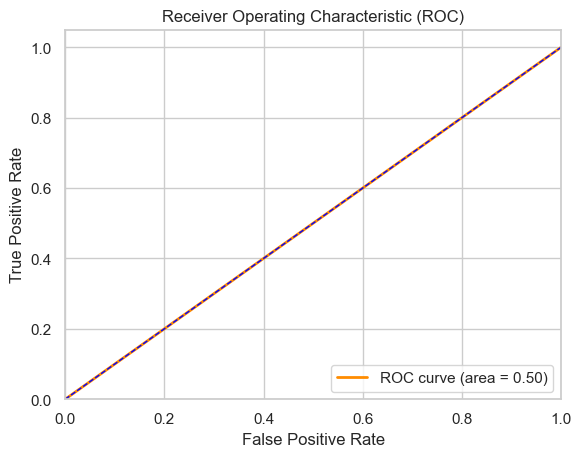

In [54]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': [0.1, 1, 10],  # Kernel coefficient (relevant for 'rbf' kernel)
}

# Create the SVM model
svm_model = SVC(random_state=0)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_transformed_smote, y_train_smote)

# Best hyperparameters found
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the best model on the test set
best_svm_model = grid_search.best_estimator_
svm_predictions = best_svm_model.predict(X_test_transformed)

# Calculate performance metrics
svm_classification_report = classification_report(y_test, svm_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Print metrics
print("SVM Classification Report:\n", svm_classification_report)
print("Confusion Matrix:\n", svm_conf_matrix)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, svm_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Decision tree classifier

ROC AUC: 0.5938133874239351


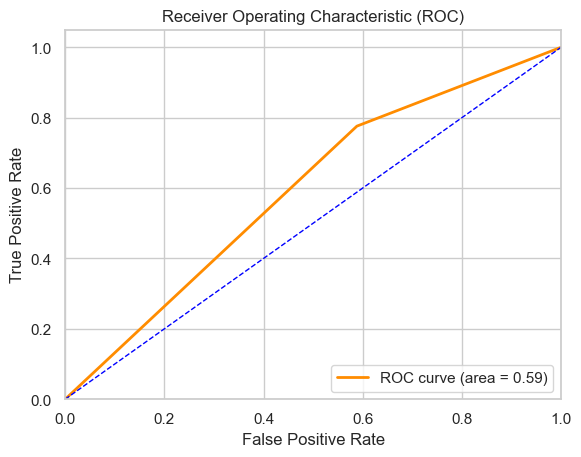

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.41      0.38        51
           1       0.82      0.78      0.80       174

    accuracy                           0.69       225
   macro avg       0.58      0.59      0.59       225
weighted avg       0.71      0.69      0.70       225

Confusion Matrix:
 [[ 21  30]
 [ 39 135]]


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_transformed_smote, y_train_smote)

# Compute probabilities for positive class
dt_probabilities = dt_model.predict_proba(X_test_transformed)[:, 1]

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dt_probabilities)
roc_auc = auc(fpr, tpr)

# Print ROC AUC
print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test_transformed)

# Evaluate the model
dt_classification_report = classification_report(y_test, dt_predictions)

# Confusion Matrix
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

# Print metrics
print("Decision Tree Classification Report:\n", dt_classification_report)
print("Confusion Matrix:\n", dt_conf_matrix)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.49      0.45        51
           1       0.84      0.79      0.82       174

    accuracy                           0.72       225
   macro avg       0.63      0.64      0.63       225
weighted avg       0.74      0.72      0.73       225

Confusion Matrix:
 [[ 25  26]
 [ 36 138]]


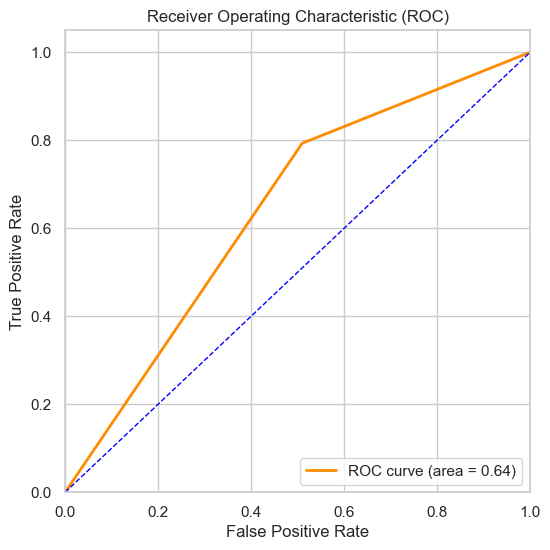

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc


# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the grid search object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the scoring metric
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Print progress
    n_jobs=-1  # Use all available CPU cores
)

# Perform grid search on the training data
grid_search.fit(X_train_transformed_smote, y_train_smote)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
dt_predictions = best_model.predict(X_test_transformed)

# Evaluate the best model
dt_classification_report = classification_report(y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

# Print metrics
print("Decision Tree Classification Report:\n", dt_classification_report)
print("Confusion Matrix:\n", dt_conf_matrix)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, dt_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


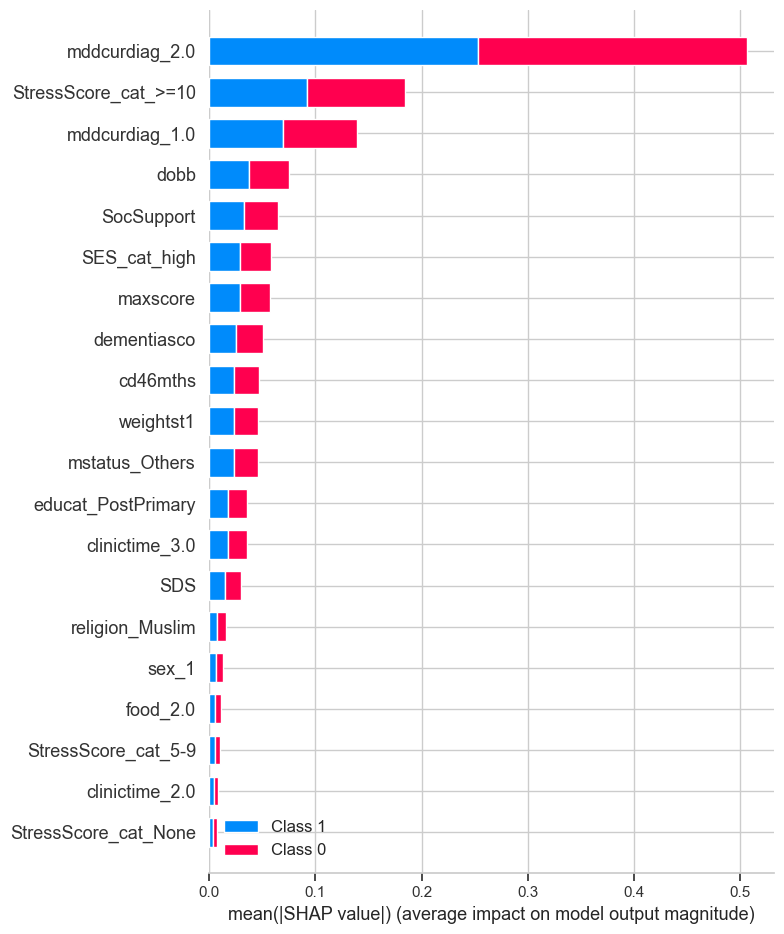

In [41]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(best_model, X_train_transformed_smote)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test_transformed)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


Ensemble classification models

Random forest classifier

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.39        51
           1       0.82      0.91      0.86       174

    accuracy                           0.77       225
   macro avg       0.66      0.61      0.62       225
weighted avg       0.75      0.77      0.75       225

Confusion Matrix:
 [[ 16  35]
 [ 16 158]]


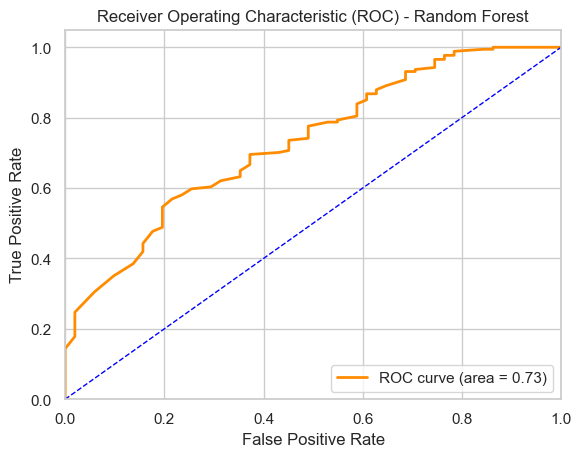

In [42]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed_smote, y_train_smote)
rf_predictions = rf_model.predict(X_test_transformed)
rf_classification_report = classification_report(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)


# Compute ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_transformed)[:,1])
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Print metrics for Random Forest
print("Random Forest Classification Report:\n", rf_classification_report)
print("Confusion Matrix:\n", rf_conf_matrix)

# Plot ROC curve for Random Forest
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

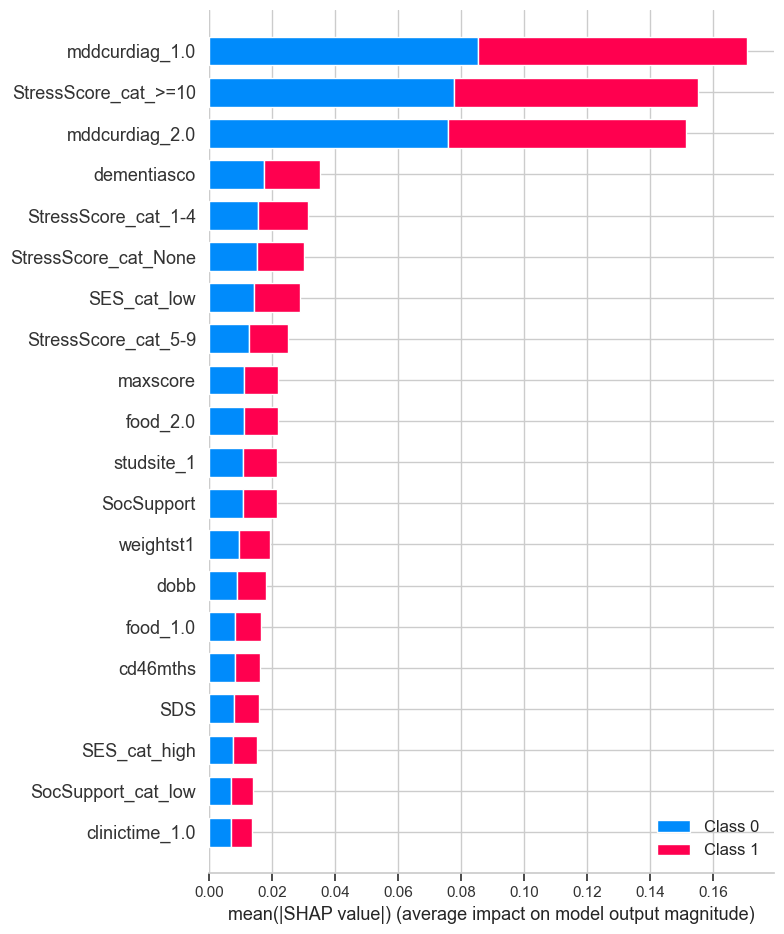

In [43]:
import shap
# Define your feature names here before preprocessing
feature_names_original = list(X_train.columns)  

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed_smote, y_train_smote)

# Compute SHAP values for the trained model
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_transformed)

# Create a list of feature names
numeric_feature_names = preprocessor.transformers_[0][2]
categorical_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(input_features=category_var)
feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, plot_type='bar')

plt.show()


Best Hyperparameters: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 138}
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.31      0.38        51
           1       0.82      0.90      0.85       174

    accuracy                           0.76       225
   macro avg       0.64      0.61      0.62       225
weighted avg       0.74      0.76      0.75       225

Confusion Matrix:
 [[ 16  35]
 [ 18 156]]


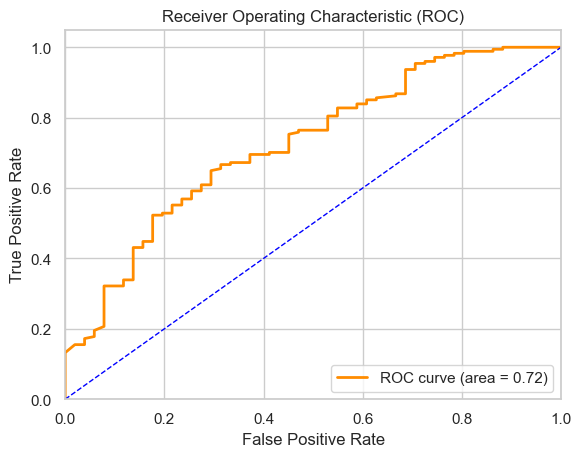

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters grid
param_dist = {
    'n_estimators': randint(50, 201),  # Number of trees in the forest
    'max_depth': [None] + list(range(5, 21)),  # Maximum depth of the tree
    'min_samples_split': randint(2, 11),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 5)  # Minimum number of samples required to be at a leaf node
}

# Create the randomized search object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   scoring='accuracy',  # Use accuracy as the scoring metric
                                   cv=5,  # 5-fold cross-validation
                                   random_state=42,  # Fix random state for reproducibility
                                   n_jobs=-1)  # Use all available CPU cores

# Perform randomized search on the training data
random_search.fit(X_train_transformed_smote, y_train_smote)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
rf_predictions = best_model.predict(X_test_transformed)

# Evaluate the best model
rf_classification_report = classification_report(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

# Print metrics
print("Random Forest Classification Report:\n", rf_classification_report)
print("Confusion Matrix:\n", rf_conf_matrix)

# Make predictions on the test set using the best model
rf_probabilities = best_model.predict_proba(X_test_transformed)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Adaboost

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.37      0.42        51
           1       0.83      0.89      0.86       174

    accuracy                           0.77       225
   macro avg       0.66      0.63      0.64       225
weighted avg       0.75      0.77      0.76       225

Confusion Matrix:
 [[ 19  32]
 [ 20 154]]



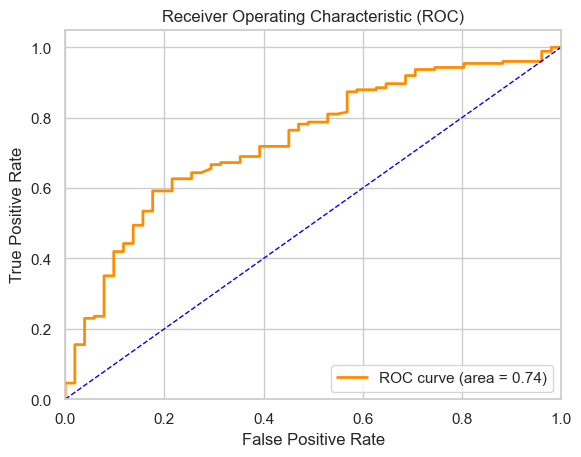

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc
import matplotlib.pyplot as plt

# AdaBoost
ada_model = AdaBoostClassifier(random_state=42)

# Train the AdaBoost model
ada_model.fit(X_train_transformed_smote, y_train_smote)

# Make predictions on the test set
ada_predictions = ada_model.predict(X_test_transformed)

# Evaluate the model
ada_classification_report = classification_report(y_test, ada_predictions)
ada_conf_matrix = confusion_matrix(y_test, ada_predictions)

# Print classification report, confusion matrix, MCC, and Kappa
print("AdaBoost Classification Report:\n", ada_classification_report)
print("Confusion Matrix:\n", ada_conf_matrix)

print()

# Generate ROC curve and compute AUC
ada_probabilities = ada_model.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, ada_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 177}
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.33      0.39        51
           1       0.82      0.89      0.85       174

    accuracy                           0.76       225
   macro avg       0.65      0.61      0.62       225
weighted avg       0.74      0.76      0.75       225

Confusion Matrix:
 [[ 17  34]
 [ 19 155]]



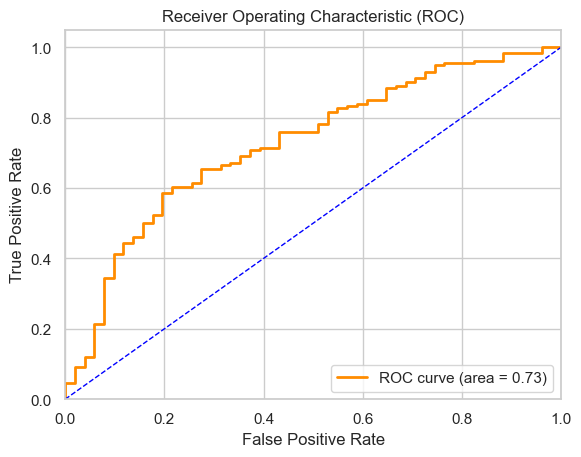

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint

# Define the hyperparameters grid
param_dist = {
    'n_estimators': randint(50, 201),  # Number of estimators (trees) in the ensemble
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],  # Learning rate for the AdaBoost algorithm
    'algorithm': ['SAMME', 'SAMME.R']  # The algorithm used for boosting
}

# Create the randomized search object
random_search = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   scoring='accuracy',  # Use accuracy as the scoring metric
                                   cv=5,  # 5-fold cross-validation
                                   random_state=42,  # Fix random state for reproducibility
                                   n_jobs=-1)  # Use all available CPU cores

# Perform randomized search on the training data
random_search.fit(X_train_transformed_smote, y_train_smote)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
ada_predictions = best_model.predict(X_test_transformed)

# Evaluate the best model
ada_classification_report = classification_report(y_test, ada_predictions)
ada_conf_matrix = confusion_matrix(y_test, ada_predictions)


# Print classification report, confusion matrix, MCC, and Kappa
print("AdaBoost Classification Report:\n", ada_classification_report)
print("Confusion Matrix:\n", ada_conf_matrix)
print()

# Generate ROC curve and compute AUC
ada_probabilities = best_model.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, ada_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Gradient boosting machine

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.33      0.41        51
           1       0.82      0.92      0.87       174

    accuracy                           0.79       225
   macro avg       0.69      0.63      0.64       225
weighted avg       0.76      0.79      0.77       225

Confusion Matrix:
 [[ 17  34]
 [ 14 160]]



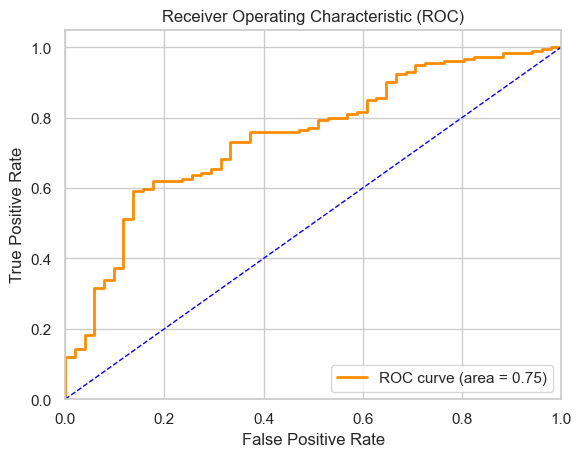

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_transformed_smote, y_train_smote)

# Make predictions on the test set
gb_predictions = gb_model.predict(X_test_transformed)

# Evaluate the model
gb_classification_report = classification_report(y_test, gb_predictions)
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)

# Print metrics
print("Gradient Boosting Classification Report:\n", gb_classification_report)
print("Confusion Matrix:\n", gb_conf_matrix)

print()

# Calculate predicted probabilities for class 1
gb_probs = gb_model.predict_proba(X_test_transformed)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, gb_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 90}
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.37      0.43        51
           1       0.83      0.89      0.86       174

    accuracy                           0.77       225
   macro avg       0.66      0.63      0.64       225
weighted avg       0.75      0.77      0.76       225

Confusion Matrix:
 [[ 19  32]
 [ 19 155]]



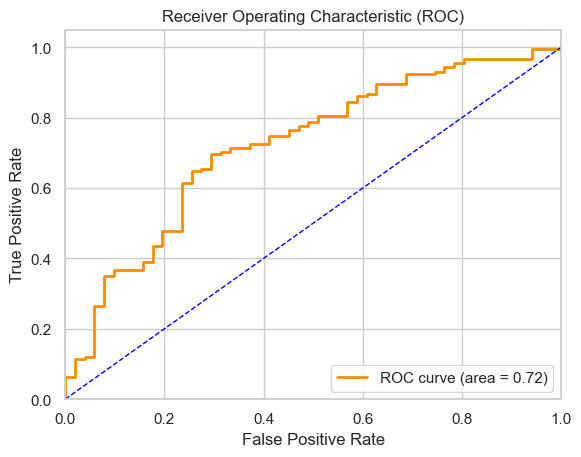

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_curve, auc

# Define the hyperparameters grid
param_dist = {
    'n_estimators': randint(50, 201),  # Number of estimators (trees) in the ensemble
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],  # Learning rate for gradient boosting
    'max_depth': [3, 4, 5, 6, 7],  # Maximum depth of the individual trees
    'min_samples_split': randint(2, 11),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 5)  # Minimum number of samples required to be at a leaf node
}

# Create the randomized search object
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   scoring='accuracy',  # Use accuracy as the scoring metric
                                   cv=5,  # 5-fold cross-validation
                                   random_state=42,  # Fix random state for reproducibility
                                   n_jobs=-1)  # Use all available CPU cores

# Perform randomized search on the training data
random_search.fit(X_train_transformed_smote, y_train_smote)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
gb_predictions = best_model.predict(X_test_transformed)

# Evaluate the best model
gb_classification_report = classification_report(y_test, gb_predictions)
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)

# Print classification report, confusion matrix, MCC, and Kappa
print("Gradient Boosting Classification Report:\n", gb_classification_report)
print("Confusion Matrix:\n", gb_conf_matrix)

print()

# Calculate predicted probabilities for class 1
gb_probs = best_model.predict_proba(X_test_transformed)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, gb_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Extreme gradient boosting

Extreme Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.25      0.31        51
           1       0.80      0.89      0.84       174

    accuracy                           0.74       225
   macro avg       0.60      0.57      0.58       225
weighted avg       0.71      0.74      0.72       225

Confusion Matrix:
 [[ 13  38]
 [ 20 154]]



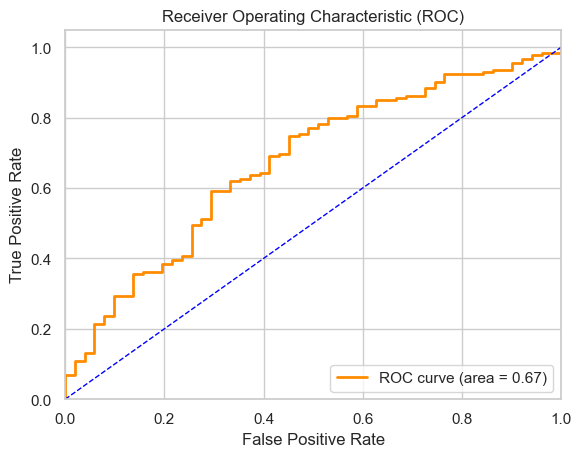

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_transformed_smote, y_train_smote)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test_transformed)

# Evaluate the model
xgb_classification_report = classification_report(y_test, xgb_predictions)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

# Print metrics
print("Extreme Gradient Boosting Classification Report:\n", xgb_classification_report)
print("Confusion Matrix:\n", xgb_conf_matrix)
print()

# Calculate predicted probabilities for class 1
xgb_probs = xgb_model.predict_proba(X_test_transformed)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Best Hyperparameters: {'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 157, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'subsample': 0.6}
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.29      0.36        51
           1       0.81      0.90      0.86       174

    accuracy                           0.76       225
   macro avg       0.64      0.60      0.61       225
weighted avg       0.74      0.76      0.74       225

Confusion Matrix:
 [[ 15  36]
 [ 17 157]]
Matthews Correlation Coefficient: 0.2354
Cohen's Kappa: 0.2262



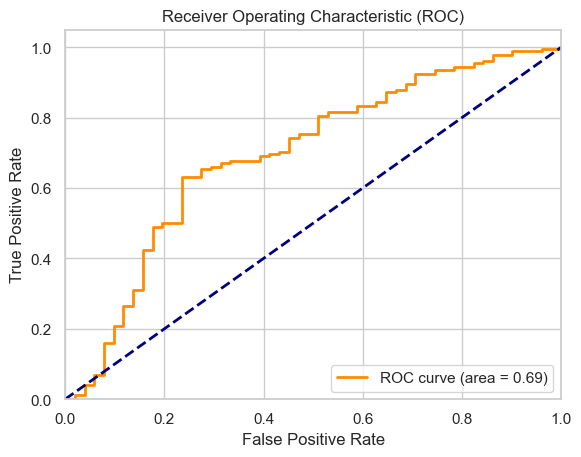

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import make_scorer, classification_report, confusion_matrix,roc_curve, auc

# Define the hyperparameters grid
param_dist = {
    'n_estimators': randint(50, 201),  # Number of trees in the forest
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],  # Learning rate for gradient boosting
    'max_depth': [3, 4, 5, 6, 7],  # Maximum depth of the individual trees
    'min_child_weight': randint(1, 11),  # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1.0],  # L2 regularization term on weights
}

# Create the randomized search object
random_search = RandomizedSearchCV(estimator=XGBClassifier(random_state=42, n_jobs=-1),
                                   param_distributions=param_dist,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   scoring={'MCC': make_scorer(matthews_corrcoef), 'Kappa': make_scorer(cohen_kappa_score)},
                                   cv=5,  # 5-fold cross-validation
                                   refit='MCC',  # Choose MCC for best model selection
                                   random_state=42,  # Fix random state for reproducibility
                                   n_jobs=-1)  # Use all available CPU cores

# Perform randomized search on the training data
random_search.fit(X_train_transformed_smote, y_train_smote)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
xgb_predictions = best_model.predict(X_test_transformed)

# Compute predicted probabilities for ROC curve
xgb_probabilities = best_model.predict_proba(X_test_transformed)[:, 1]

# Evaluate the best model
xgb_classification_report = classification_report(y_test, xgb_predictions)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)
xgb_mcc = matthews_corrcoef(y_test, xgb_predictions)
xgb_kappa = cohen_kappa_score(y_test, xgb_predictions)

# Print metrics
print("XGBoost Classification Report:\n", xgb_classification_report)
print("Confusion Matrix:\n", xgb_conf_matrix)
print(f"Matthews Correlation Coefficient: {xgb_mcc:.4f}")
print(f"Cohen's Kappa: {xgb_kappa:.4f}")
print()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Light gradient boosting

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.22      0.28        51
           1       0.80      0.91      0.85       174

    accuracy                           0.75       225
   macro avg       0.60      0.56      0.57       225
weighted avg       0.71      0.75      0.72       225

Confusion Matrix:
 [[ 11  40]
 [ 16 158]]
Matthews Correlation Coefficient: 0.1594
Cohen's Kappa: 0.1484



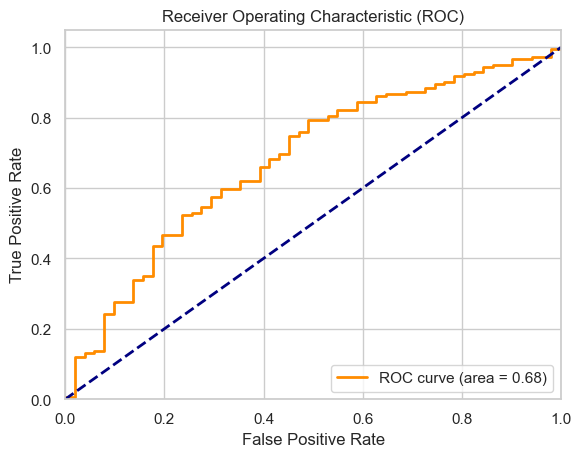

In [52]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_curve, auc
import matplotlib.pyplot as plt

# LightGBM
lgb_model = LGBMClassifier(random_state=42, verbose=-1)

lgb_model.fit(X_train_transformed_smote, y_train_smote)

# Make predictions on the test set
lgb_predictions = lgb_model.predict(X_test_transformed)

# Compute predicted probabilities for ROC curve
lgb_probabilities = lgb_model.predict_proba(X_test_transformed)[:, 1]

# Evaluate the model
lgb_classification_report = classification_report(y_test, lgb_predictions)
lgb_conf_matrix = confusion_matrix(y_test, lgb_predictions)
lgb_mcc = matthews_corrcoef(y_test, lgb_predictions)
lgb_kappa = cohen_kappa_score(y_test, lgb_predictions)

# Print metrics
print("LightGBM Classification Report:\n", lgb_classification_report)
print("Confusion Matrix:\n", lgb_conf_matrix)
print(f"Matthews Correlation Coefficient: {lgb_mcc:.4f}")
print(f"Cohen's Kappa: {lgb_kappa:.4f}")
print()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lgb_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 145, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'subsample': 0.6}
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.29      0.34        51
           1       0.81      0.87      0.84       174

    accuracy                           0.74       225
   macro avg       0.61      0.58      0.59       225
weighted avg       0.72      0.74      0.73       225

Confusion Matrix:
 [[ 15  36]
 [ 22 152]]
Matthews Correlation Coefficient: 0.1894
Cohen's Kappa: 0.1857
AUC: 0.5838



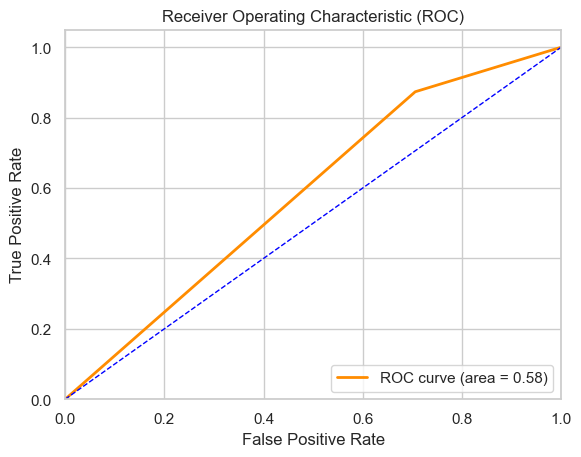

In [53]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters grid
param_dist = {
    'n_estimators': randint(50, 201),  # Number of trees in the forest
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],  # Learning rate for gradient boosting
    'max_depth': [3, 4, 5, 6, 7],  # Maximum depth of the individual trees
    'min_child_weight': randint(1, 11),  # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1.0],  # L2 regularization term on weights
}

# Create the randomized search object
random_search = RandomizedSearchCV(estimator=LGBMClassifier(random_state=42, verbose=-1),
                                   param_distributions=param_dist,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   scoring={'MCC': make_scorer(matthews_corrcoef), 'Kappa': make_scorer(cohen_kappa_score)},
                                   cv=5,  # 5-fold cross-validation
                                   refit='MCC',  # Choose MCC for best model selection
                                   random_state=42,  # Fix random state for reproducibility
                                   n_jobs=-1)  # Use all available CPU cores

# Perform randomized search on the training data
random_search.fit(X_train_transformed_smote, y_train_smote)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
lgb_predictions = best_model.predict(X_test_transformed)
# Evaluate the best model
lgb_classification_report = classification_report(y_test, lgb_predictions)
lgb_conf_matrix = confusion_matrix(y_test, lgb_predictions)
lgb_mcc = matthews_corrcoef(y_test, lgb_predictions)
lgb_kappa = cohen_kappa_score(y_test, lgb_predictions)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, lgb_predictions)
roc_auc = auc(fpr, tpr)

# Print classification report, confusion matrix, MCC, and Kappa
print("LightGBM Classification Report:\n", lgb_classification_report)
print("Confusion Matrix:\n", lgb_conf_matrix)
print(f"Matthews Correlation Coefficient: {lgb_mcc:.4f}")
print(f"Cohen's Kappa: {lgb_kappa:.4f}")
print(f"AUC: {roc_auc:.4f}")
print()

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
